In [9]:
import pyorc
import numpy as np
import pandas as pd
import xarray as xr
import seaborn as sns
import matplotlib.pyplot as plt

In [10]:
radar = pd.read_csv('july17.csv')
radar = radar.rename(columns={' Average velocity value': 'v_len'})
print(radar.columns)
radar

Index(['Time stamp', 'v_len', 'Average velocity unit', 'Flow direction value',
       'Flow direction unit', 'Average SNR value', 'Average SNR unit',
       'Tilt angle value', 'Tilt angle unit'],
      dtype='object')


,Time stamp,v_len,Average velocity unit,Flow direction value,Flow direction unit,Average SNR value,Average SNR unit,Tilt angle value,Tilt angle unit
0,7/17/2024 3:12:28 PM,1.2,m/s,Out,NaN,30,dB,59,deg
1,7/17/2024 3:12:28 PM,1.2,m/s,Out,NaN,30,dB,59,deg
2,7/17/2024 3:12:28 PM,1.2,m/s,Out,NaN,30,dB,59,deg
3,7/17/2024 3:12:28 PM,1.2,m/s,Out,NaN,30,dB,59,deg
4,7/17/2024 3:12:28 PM,1.2,m/s,Out,NaN,30,dB,59,deg
...,...,...,...,...,...,...,...,...,...
2005,7/17/2024 3:16:04 PM,1.1,m/s,Out,NaN,23,dB,31,deg
2006,7/17/2024 3:16:04 PM,1.1,m/s,Out,NaN,23,dB,31,deg
2007,7/17/2024 3:16:04 PM,1.1,m/s,Out,NaN,23,dB,31,deg
2008,7/17/2024 3:16:04 PM,1.1,m/s,Out,NaN,23,dB,31,deg


In [11]:
# print(radar['Time stamp'].dtype)
# radar['Time stamp']

In [12]:
radar['Time stamp'] = pd.to_datetime(radar['Time stamp'], format="%m/%d/%Y %I:%M:%S %p")
# print(radar['Time stamp'].dtype)
# radar['Time stamp']

In [ ]:
radar = radar['Tilt angle value']

<Axes: xlabel='Time stamp', ylabel='Tilt angle value'>

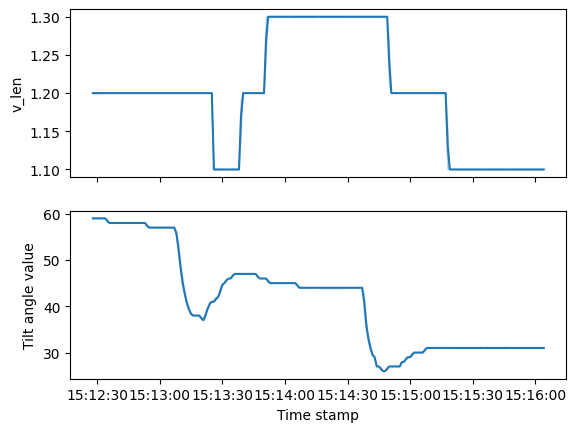

In [13]:
fig, ax = plt.subplots(2, sharex=True)

sns.lineplot(
    data=radar,
    x='Time stamp',
    y='v_len',
    ax = ax[0]
)
sns.lineplot(
    data=radar,
    x='Time stamp',
    y='Tilt angle value',
    ax=ax[1]
)

In [14]:
ds = xr.open_dataset('video_capture_2024-07-17_14-30-04_velocimetry_results.nc')
ds = ds.mean(dim="time", keep_attrs=True)

df = ds.to_dataframe().reset_index(); ds.close()
df['v_len'] = np.sqrt(df.v_x**2 + df.v_y**2)
df

,y,x,v_x,v_y,s2n,corr,xp,yp,xs,ys,v_len
0,9.645,0.125,NaN,NaN,0.00000,0.00000,-516.845459,-125.344238,4.849573,4.702055,NaN
1,9.645,0.255,NaN,NaN,0.00000,0.00000,-468.762756,-80.596313,4.856762,4.831856,NaN
2,9.645,0.385,NaN,NaN,0.00000,0.00000,-423.157257,-38.153687,4.863951,4.961657,NaN
3,9.645,0.515,NaN,NaN,0.00000,0.00000,-379.842316,2.157104,4.871140,5.091458,NaN
4,9.645,0.645,NaN,NaN,0.00000,0.00000,-338.649628,40.492920,4.878329,5.221259,NaN
...,...,...,...,...,...,...,...,...,...,...,...
11391,0.155,19.495,0.204333,0.062333,2.63032,0.43400,1667.141235,1291.775879,15.396224,23.517611,0.213629
11392,0.155,19.625,0.158205,-0.051624,2.40704,0.40920,1665.152832,1293.273438,15.403413,23.647412,0.166415
11393,0.155,19.755,0.150744,-0.006942,2.41400,0.41056,1663.186035,1294.754639,15.410602,23.777213,0.150904
11394,0.155,19.885,0.148430,0.024959,2.60536,0.43368,1661.240234,1296.220093,15.417791,23.907014,0.150514


In [15]:
ds = xr.open_dataset('video_capture_2024-07-17_14-30-04_velocimetry_results.nc')

ds.velocimetry.mask.corr(inplace=True)
ds.velocimetry.mask.minmax(inplace=True)
ds.velocimetry.mask.rolling(inplace=True)
ds.velocimetry.mask.outliers(inplace=True)
ds.velocimetry.mask.variance(inplace=True)
ds.velocimetry.mask.angle(angle_tolerance=0.5*np.pi)
ds.velocimetry.mask.count(inplace=True)
ds.velocimetry.mask.window_mean(wdw=2, inplace=True, tolerance=0.5, reduce_time=True)

ds = ds.mean(dim="time", keep_attrs=True)

df_post = ds.to_dataframe().reset_index(); ds.close()
df_post['v_len'] = np.sqrt(df_post.v_x**2 + df_post.v_y**2)
df_post

/home/waterlab/anaconda3/envs/pyorc/lib/python3.12/site-packages/numpy/lib/nanfunctions.py:1879: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/waterlab/anaconda3/envs/pyorc/lib/python3.12/site-packages/numpy/lib/nanfunctions.py:1879: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,


,y,x,v_x,v_y,s2n,corr,xp,yp,xs,ys,v_len
0,9.645,0.125,NaN,NaN,NaN,NaN,-516.845459,-125.344238,4.849573,4.702055,NaN
1,9.645,0.255,NaN,NaN,NaN,NaN,-468.762756,-80.596313,4.856762,4.831856,NaN
2,9.645,0.385,NaN,NaN,NaN,NaN,-423.157257,-38.153687,4.863951,4.961657,NaN
3,9.645,0.515,NaN,NaN,NaN,NaN,-379.842316,2.157104,4.871140,5.091458,NaN
4,9.645,0.645,NaN,NaN,NaN,NaN,-338.649628,40.492920,4.878329,5.221259,NaN
...,...,...,...,...,...,...,...,...,...,...,...
11391,0.155,19.495,NaN,NaN,NaN,NaN,1667.141235,1291.775879,15.396224,23.517611,NaN
11392,0.155,19.625,NaN,NaN,NaN,NaN,1665.152832,1293.273438,15.403413,23.647412,NaN
11393,0.155,19.755,NaN,NaN,NaN,NaN,1663.186035,1294.754639,15.410602,23.777213,NaN
11394,0.155,19.885,NaN,NaN,NaN,NaN,1661.240234,1296.220093,15.417791,23.907014,NaN


MEAN VELOCITY
Radar                   : 1.200099502487562
PyORC                   : 0.33741697325936415
PyORC w/ post-processing: 0.721480021739858


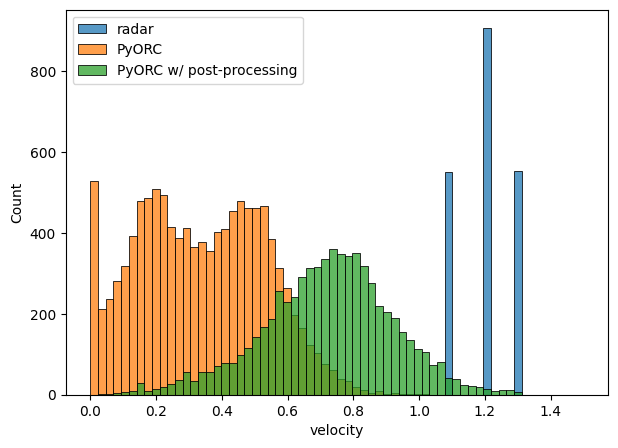

In [16]:
print('MEAN VELOCITY')
print(f'{'Radar':<24}: {np.mean(radar['v_len'])}')
print(f'{'PyORC':<24}: {np.mean(df['v_len'])}')
print(f'{'PyORC w/ post-processing':<24}: {np.mean(df_post['v_len'])}')

range = [0,1.5]
n=64

plt.figure(figsize=(7, 5))

sns.histplot(
    data=radar,
    x='v_len',
    binrange=range,
    bins=n,
    label='radar'
)
sns.histplot(
    data=df,
    x='v_len',
    binrange=range,
    bins=n,
    label='PyORC'
)
sns.histplot(
    data=df_post,
    x='v_len',
    binrange=range,
    bins=n,
    label='PyORC w/ post-processing'
)

plt.xlabel('velocity')
plt.legend()